In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [38]:
### 1.1

# I cleaned the `Price` variable by removing commas and converting the data type to numeric
airbnb_df = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
airbnb_df["Price"] = airbnb_df["Price"].str.replace(",", "").astype(int)
airbnb_df["Price"].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [39]:
### 1.2

mn_df = pd.read_csv("data/mn_police_use_of_force.csv")
print(mn_df["subject_injury"].value_counts(dropna=False))

# Approximately 76% of the `subject_inquiry` values are missing 
num_missing_proportion = mn_df["subject_injury"].isna().mean() * 100
print(num_missing_proportion)

# Fill NaN with "Missing"
mn_df["subject_injury"] = mn_df["subject_injury"].fillna("Missing")
print(mn_df["subject_injury"].value_counts(dropna=False))

# Cross-Tabulate `subject_inquiry` with `force_type`
'''
The cross-tabulation shows that missing values in subject_injury are not evenly distributed across force types. 
Missing injury data is more common for bodily force, chemical irritants, and taser use, and less common for baton and firearm use
(however those categories had fewer observations in general). This suggests that the missing values are not random and 
actually disproportionately associated with certain force types.
'''
pd.crosstab(
    mn_df["subject_injury"],
    mn_df["force_type"],
    dropna=False
)


subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
76.19342359767892
subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [ ]:
### 1.3

metabric_df = pd.read_csv("data/metabric.csv")
metabric_df["Overall Survival Status"] = metabric_df["Overall Survival Status"].map({
    "0:LIVING": 1,
    "1:DECEASED": 0        
})
metabric_df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [ ]:
### 1.4 

# There are 8323 missing values for "Review Scores Rating"
num_missing = airbnb_df["Review Scores Rating"].isna().sum()

'''
The median value may not always be reflective of what the true value would have been. Also, depending on the proportion of missing values,
imputation may significantly change the statistical distribution of the data and the relationships between variables, since uncertain 
values would be replaced with a single, artifical number.
'''

# Impute NaN with Median of "Review Scores Rating"
airbnb_df["Review Scores Rating (Imputed)"] = airbnb_df["Review Scores Rating"].fillna(airbnb_df["Review Scores Rating"].median())
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Review Scores Rating (Imputed)
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,96.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [55]:
! pip install xlrd

In [113]:
### 2.1
sharks_df = pd.read_excel("data/GSAF5.xls")
sharks_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
### 2.2
print(sharks_df.columns)
sharks_df = sharks_df.drop(columns=["Unnamed: 21", "Unnamed: 22"])
sharks_df.head()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
### 2.3
 
'''
Each observation (or row) in this dataset is a shark attack incident with information regarding when, where, type of attack,
whether it was fatal, etc. This impacts how data cleaning and analysis should happen because the definition of an observation 
determines how to merge data and interpret statistics (which should be at the incident level).
'''

'\nEach observation (or row) in this dataset is a shark attack incident with information regarding when, where, type of attack,\nwhether it was fatal, etc. This impacts how data cleaning and analysis should happen because the definition of an observation \ndetermines how to merge data and interpret statistics (which should be at the incident level).\n'

' \nThe number of shark attacks have had an overall increasing trend since 1940, but this trend has not been consistent. There was a\nspike in shark attacks around the 1960s and then an even greater spike in the late 2010s followed by decreasing numbers after 2020.\n'

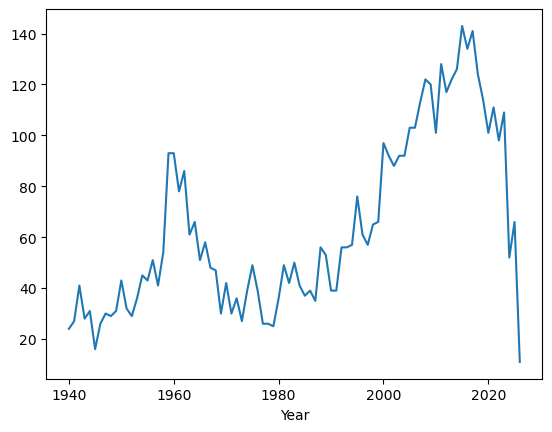

In [115]:
### 2.4

# Clean "Year" Variable
sharks_df["Year"] = sharks_df["Year"].astype("Int64")
sharks_df.loc[sharks_df["Year"] <= 1000, "Year"] = pd.NA
sharks_df["Year"].unique()

''' 
The range of values for "Year" span from the 1500s to this year, 2026. There were some earlier values (0, 55, etc.) that I replaced
with missing values (NaN), since they did not make much sense in the context of the data.
'''

# Filter Attacks Since 1940
since_1940s = sharks_df[sharks_df["Year"] >= 1940]
attacks_per_year = since_1940s["Year"].value_counts().sort_index()
attacks_per_year.plot()

''' 
The number of shark attacks have had an overall increasing trend since 1940, but this trend has not been consistent. There was a
spike in shark attacks around the 1960s and then an even greater spike in the late 2010s followed by decreasing numbers after 2020.
'''

Text(0.5, 1.0, 'Distribution of Ages in Shark Attacks')

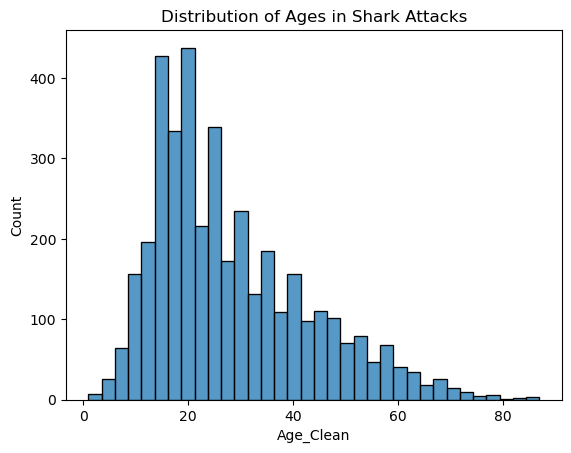

In [108]:
### 2.5

sharks_df["Age"].unique()
sharks_df["Age_Clean"] = pd.to_numeric(sharks_df["Age"], errors="coerce").astype("Int64")
sharks_df["Age_Clean"].unique()
sns.histplot(data = sharks_df, x = "Age_Clean")
plt.title("Distribution of Ages in Shark Attacks")

In [117]:
sharks_df["Type"].value_counts()

Type
Unprovoked             5224
Provoked                642
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
Boat                      7
 Provoked                 2
unprovoked                1
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [ ]:
### 2.6

# Clean "Type" Variable
sharks_df["Type"] = sharks_df["Type"].map({
    "Unprovoked": "Unprovoked",
    "unprovoked": "Unprovoked",
    "Provoked": "Provoked",
    " Provoked": "Provoked"
}).fillna("Unknown")
sharks_df["Type"].value_counts()

# The proportion of attacks that are unprovoked is ~73.8%
prop_unprovoked = (sharks_df["Type"] == "Unprovoked").mean() * 100
prop_unprovoked

73.87247278382581

In [ ]:
### 2.7

# Clean "Fatal Y/N" variable
sharks_df["Fatal Y/N"] = sharks_df["Fatal Y/N"].map({
    "Y": "Y",
    "y": "Y",
    "N": "N",
    " N": "N",
    "n": "N"
}).fillna("Unknown")

sharks_df["Fatal Y/N"].value_counts()


Fatal Y/N
N          4940
Y          1489
Unknown     644
Name: count, dtype: int64

In [129]:
### 2.8

pd.crosstab(
    sharks_df["Fatal Y/N"],
    sharks_df["Type"],
    dropna=False
)

prop_unprovoked_fatal = (21 / (21  + 1268)) * 100
prop_provoked_fatal = (614 / (614 + 3877)) * 100
print(prop_provoked_fatal, prop_unprovoked_fatal)

''' 
Based on the data, shark attacks seem more likely to be fatal when unprovoked versus when provoked.
'''

13.671788020485415 1.6291698991466252


' \nBased on the data, shark attacks seem more likely to be fatal when unprovoked versus when provoked.\n'

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

In [ ]:
### 3.1
'''
This paper is about how to streamline the process of cleaning data and performing EDA by first "tidying" the data.
'''

### 3.2
''' 
The "tidy data standard" is intended to ensure that datasets follow a consistent structure so that data analysis tools 
can work together and make EDA easier.
'''

### 3.3
''' 
All "tidy datasets" will be similar because they follow a set of guidelines that give them a consistent structure, while messy datasets
can be messy for a variety of reasons, including but not limited to missing values, non-normalized values, inconsistent observations, etc.
Therefore, just saying a dataset is messy does not reveal much about what way it is messy. Regarding the second sentence, it is often
easier to describe the details of any one dataset in particular, but finding a description that generalizes across all types of datasets
is much tougher, once again due to the lack of consistency.
'''

### 3.4
'''
A value is a single number or text entry. A variable is the thing being measured. An observation is the set of all measurements for
a single unit. 
'''

### 3.5
''' 
"Tidy data" is defined such that each variable equals one column, each observation equals one row, and each type of thing being measured 
is its own table.
'''

### 3.6
''' 
The 5 most common problems with messy datasets are:
1. Column headers are values instead of variable names
2. Multiple variables are stored in one column
3. Variables are stored in both rows and columns
4. Multiple types of observational units are stored in the same table
5. A single observational unit is stored in multiple tables
Table 4 has messy data because the column names are values of a variable instead of the actual names of variables (problem 1).
"Melting" refers to converting columns into rows so that those column names become actual data values.
'''

### 3.7
''' 
Table 11 is messy because the days are spread across columns and the variable names are stored as data. 
Table 12 is "tidy" and "molten" because it puts everything into rows such that the final version has one row per day and
one column per variable.
'''

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [2]:
### 4.1

gifts_df = pd.read_csv("data/ForeignGifts_edu.csv")
gifts_df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

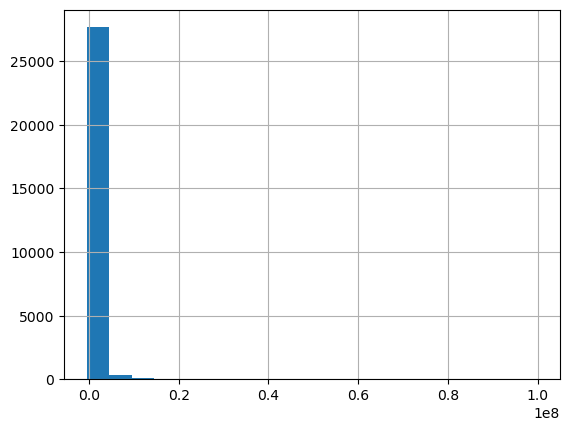

In [ ]:
### 4.2 

'''
The distribution is very right skewed, indicating that while a few select gifts are huge, the majority are on the smaller end.
This is also indicated by the fact that the mean is larger than the median because the few outliers on the higher end skew the mean.
'''
plt.hist(gifts_df["Foreign Gift Amount"])
gifts_df["Foreign Gift Amount"].describe()

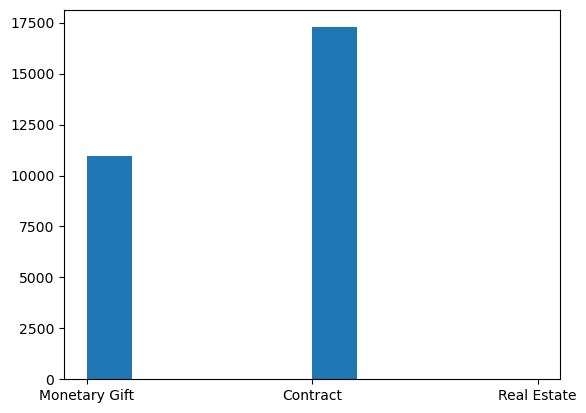

61.20973742957372 38.75128450444704 0.038978065979235324


C:\Users\shalm\AppData\Local\Temp\ipykernel_24512\3160579716.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prop_contracts = (gifts_df["Gift Type"].value_counts()[0] / total) * 100
C:\Users\shalm\AppData\Local\Temp\ipykernel_24512\3160579716.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prop_monetary = (gifts_df["Gift Type"].value_counts()[1] / total) * 100
C:\Users\shalm\AppData\Local\Temp\ipykernel_24512\3160579716.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

In [ ]:
### 4.3

plt.hist(gifts_df["Gift Type"])
plt.show()
total = len(gifts_df)

'''
The proportion of gifts that are contracts, monetary, and real estate are about 61.2%, 38.75%, and 0.03% respectively.
'''
prop_contracts = (gifts_df["Gift Type"].value_counts()[0] / total) * 100
prop_monetary = (gifts_df["Gift Type"].value_counts()[1] / total) * 100
prop_real_estate = (gifts_df["Gift Type"].value_counts()[2] / total) * 100
print(prop_contracts, prop_monetary, prop_real_estate)

In [ ]:
### 4.4

top15_country_count = gifts_df.groupby("Country of Giftor").size().sort_values(ascending=False).head(15)
top15_country_amount = gifts_df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

print(top15_country_count)
print(top15_country_amount)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


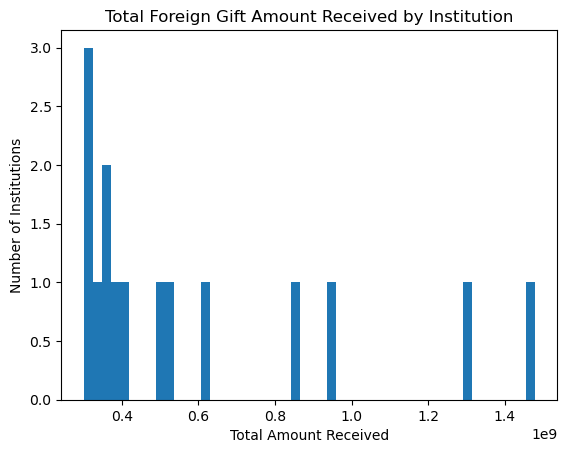

In [33]:
### 4.5

top15_institutions = gifts_df.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
print(top15_institutions)

plt.hist(top15_institutions, bins=50)
plt.title("Total Foreign Gift Amount Received by Institution")
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.show()

In [34]:
### 4.6

top_giftors = gifts_df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [36]:
### 5.1

college_df = pd.read_csv("data/college_completion.csv")

In [ ]:
### 5.2

'''
There are 3798 observations (rows) and 63 variables (columns) in the data.  
'''
print(len(college_df.columns))
print(len(college_df))
college_df.head()

63
3798


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
### 5.3

'''
Most public institutions are 2-year, while private non-profit institutions are predominantly 4-year. Private for-profit 
institutions are more evenly split, although there are still more 4-year than 2-year ones.
'''
pd.crosstab(college_df["control"], college_df["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


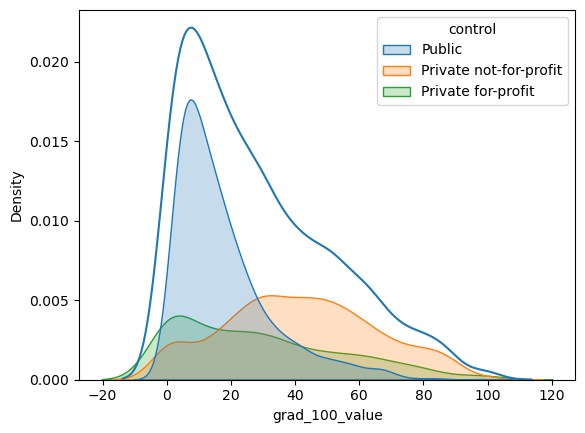

In [56]:
### 5.4

sns.kdeplot(x = college_df["grad_100_value"])
college_df["grad_100_value"].describe()

''' 
The private not-for-profits seem to have the most favorable graduation rates.
'''
# condition on control
sns.kdeplot(data=college_df, x="grad_100_value", hue="control", fill=True)

# describe table for each type of institutional control
college_df.groupby("control")["grad_100_value"].describe()

0.5758792845936073 88610.48316902433


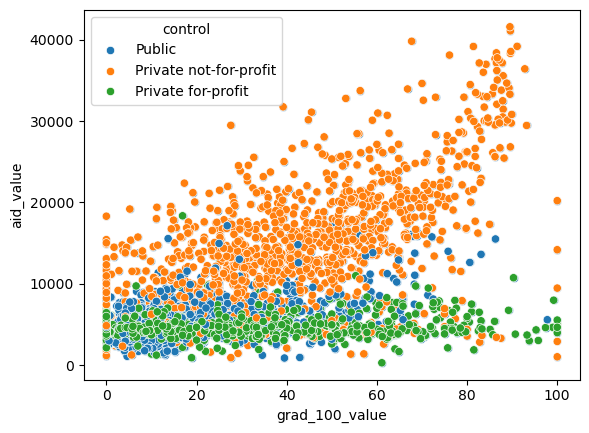

In [ ]:
### 5.5

sns.scatterplot(data=college_df, x="grad_100_value", y="aid_value")
corr = college_df['grad_100_value'].corr(college_df['aid_value'])
cov = college_df['grad_100_value'].cov(college_df['aid_value'])
print(corr, cov)

''' 
Aid seems to vary positively with graduation rates for the private not-for-profit institutions (somewhat). Overall, there isn't 
a strong correlation as the correlation value is ~0.575, which is more moderate.
'''
sns.scatterplot(data=college_df, x="grad_100_value", y="aid_value", hue="control")
plt.show()

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

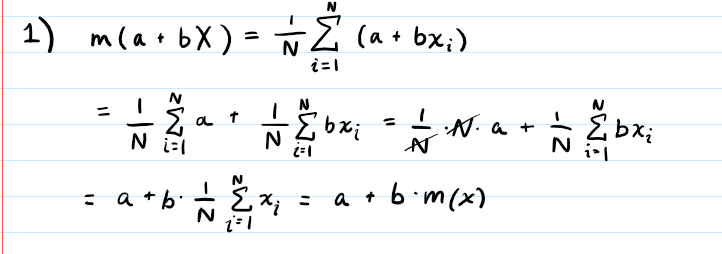

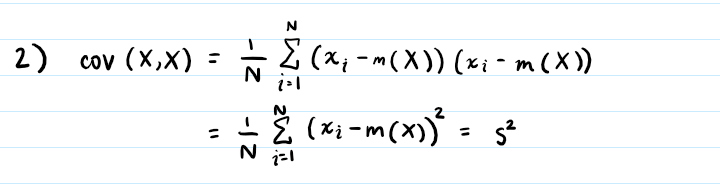

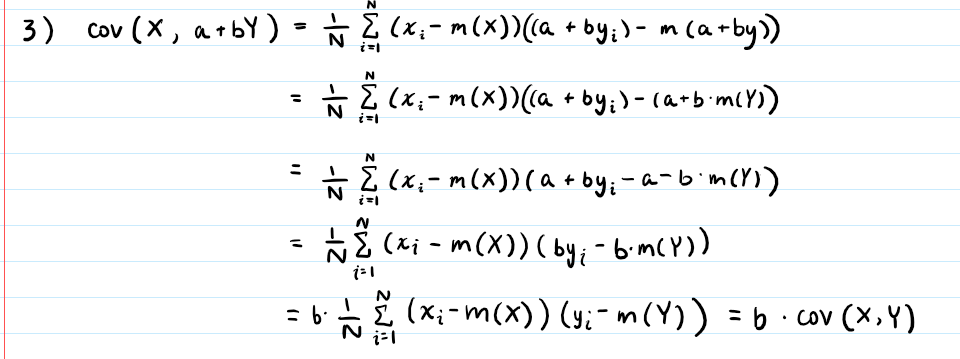

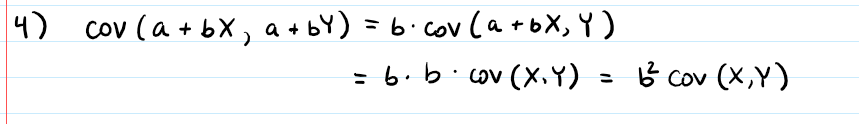

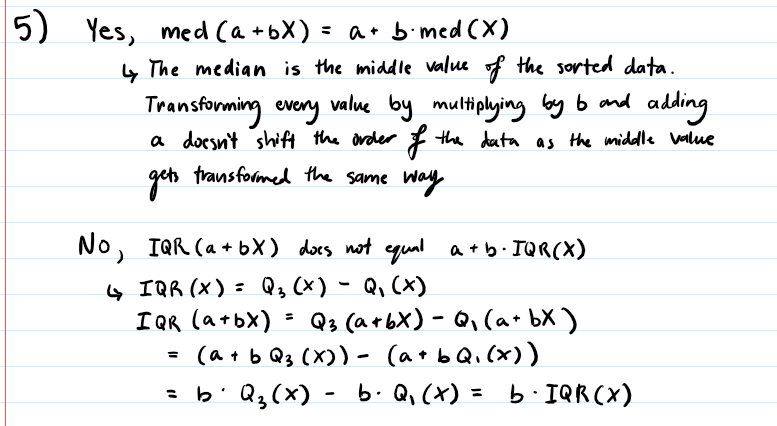

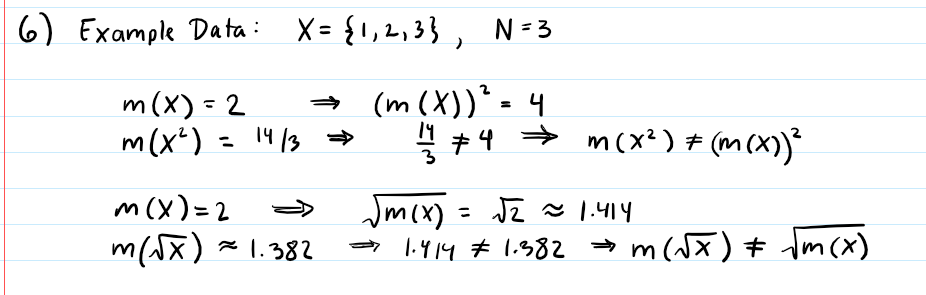

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [63]:
### 7.1

ames_df = pd.read_csv("data/ames_prices.csv")
ames_df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


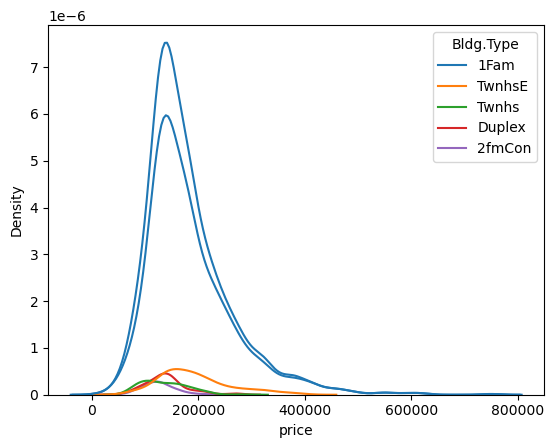

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [ ]:
### 7.2

sns.kdeplot(data=ames_df, x="price")
print(ames_df["price"].describe())

''' 
The most expensive building types on average are end-of-unit townhomes and single family homes as they have the highest
and second highest mean prices respectively. Single family homes have the highest variance in transaction prices, followed 
by end-of-unit townhomes.
'''

sns.kdeplot(data=ames_df, x="price", hue="Bldg.Type")
plt.show()
ames_df.groupby("Bldg.Type")["price"].describe()

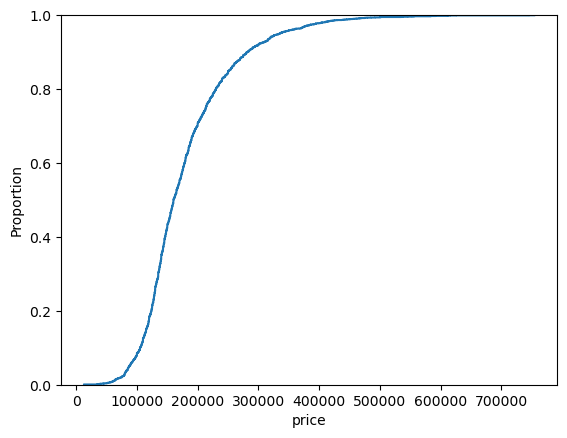

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64

In [73]:
### 7.3

sns.ecdfplot(data=ames_df, x="price")
plt.show()  

five_num = ames_df["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])
five_num

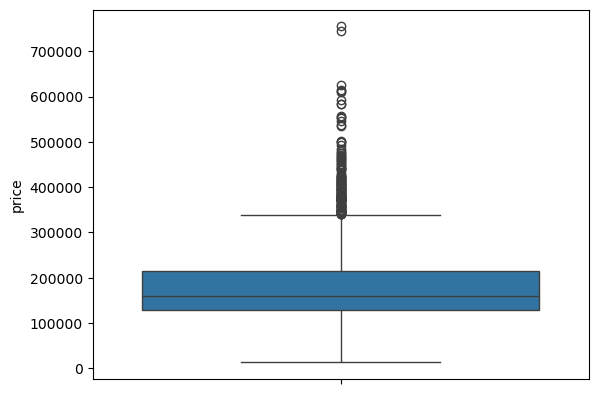

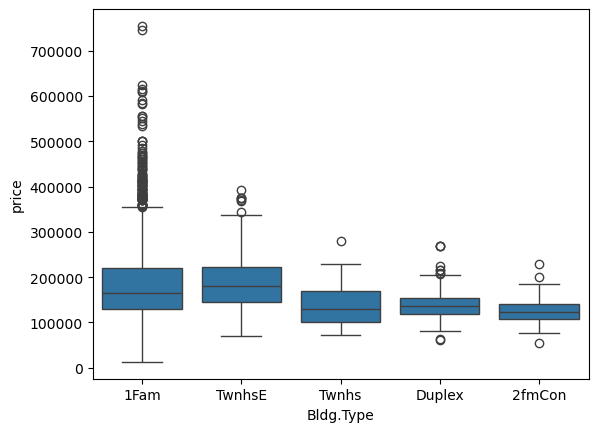

In [ ]:
### 7.4

'''  
Yes, there are outliers, specifically on the higher end.
'''
sns.boxplot(ames_df["price"])
plt.show()

''' 
Prices vary a lot by building type, and the majority of outliers are for single family homes, which also have the
greatest variance. Duplexes and 2fmCon have tighter price ranges, and are also the cheaper options along with
townhomes.
'''
sns.boxplot(data=ames_df, x="Bldg.Type", y="price")
plt.show()


In [78]:
# 7.5

def outlier_analysis(x):
    q75 = np.quantile(x, .75)
    q25 = np.quantile(x, .25)
    iqr = q75 - q25
    uw = q75 + 1.5 * iqr  # upper whisker
    lw = q25 - 1.5 * iqr  # lower whisker
    upper_outlier = (x > uw).astype(int)
    lower_outlier = (x < lw).astype(int)
    outlier = upper_outlier + lower_outlier
    winsorize = (
        upper_outlier * uw +   # map upper outlier to upper whisker
        lower_outlier * lw +   # map lower outlier to lower whisker
        (1 - outlier) * x      # if neither, keep original value
    )

    return outlier, winsorize

ames_df["price_outlier"], ames_df["price_winsor"] = outlier_analysis(ames_df["price"])
ames_df["price_outlier"].value_counts()


price_outlier
0    2793
1     137
Name: count, dtype: int64

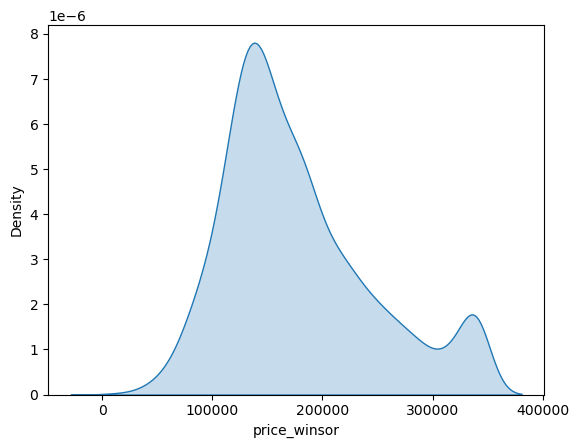

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: price_winsor, dtype: float64


In [81]:
### 7.6

'''
The results change because after winsorizing, the extreme high-end outliers are capped so the right tail becomes 
shorter and smoother. The maximum price also drops, and the mean and standard deviation both decrease since 
there is less emphasis from high-end outliers influencing those measures. The median doesn't really change because it 
is less influenced by outliers.
'''

ames_df["price_outlier"], ames_df["price_winsor"] = outlier_analysis(ames_df["price"])
sns.kdeplot(data=ames_df, x="price_winsor", fill=True)
plt.show()
print(ames_df["price_winsor"].describe())